In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\CC GENERAL.csv')

In [5]:
pd.options.display.max_columns=None

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [8]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
df.drop('CUST_ID',axis=1,inplace=True)  # OBJECT COLUMN

# FOR CLUSTERING WE NEED ONLY NUMERIC COLUMNS

In [14]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# there is an possibility of target variable in the data on the basis of description of data 

# so we need to remove target variable 
# for clustering we dont need target variable

In [18]:
df.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1,inplace=True)

# we drop this four variables because it shows the possibility of target variable 
# so we drop that four varibles.

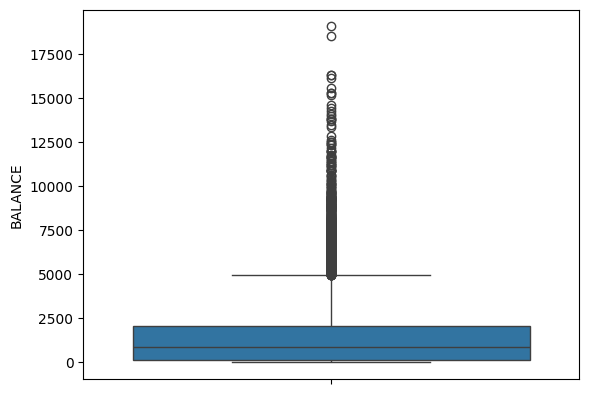

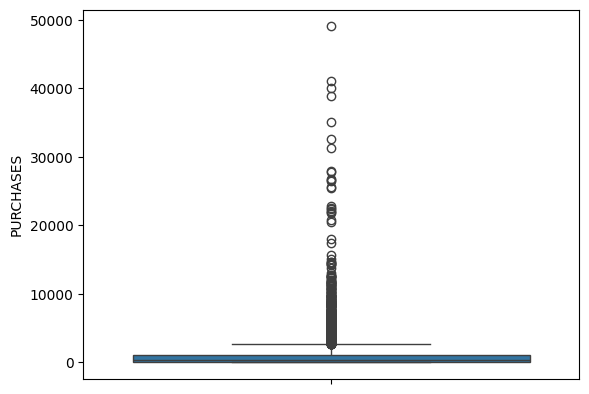

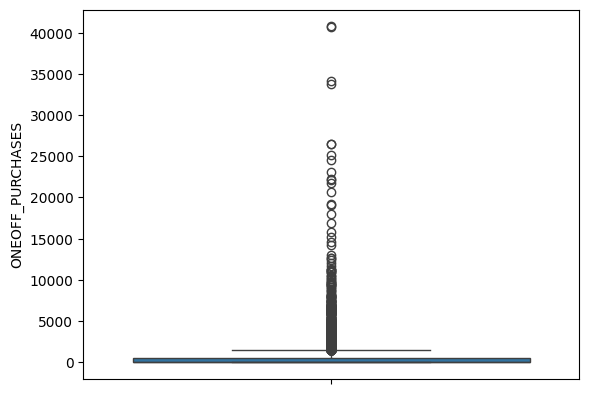

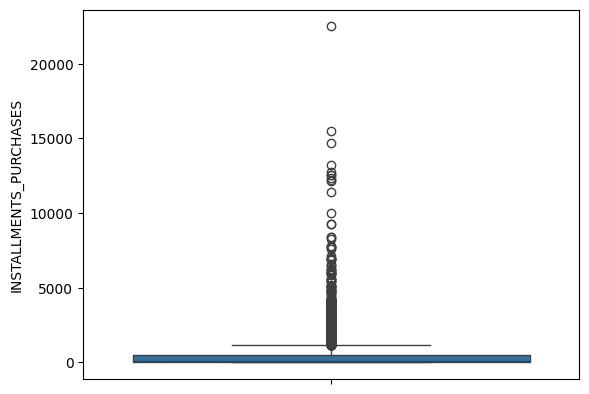

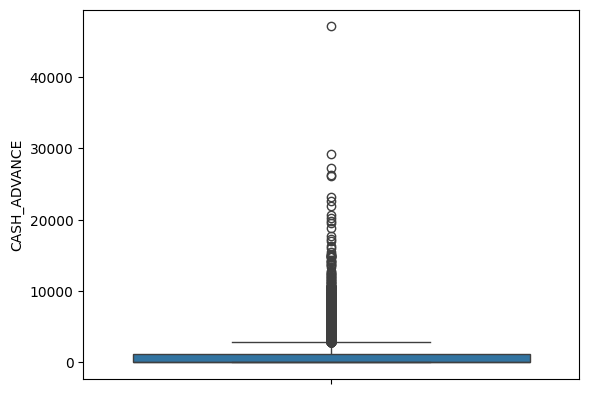

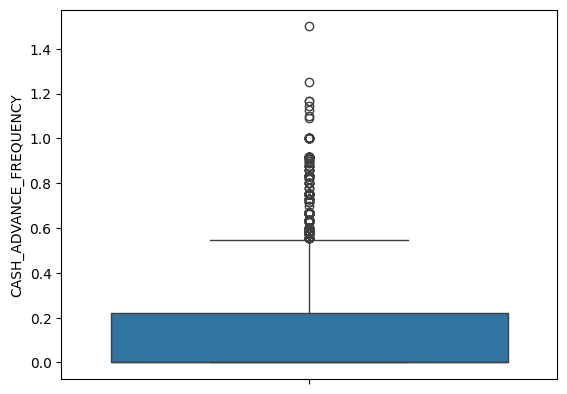

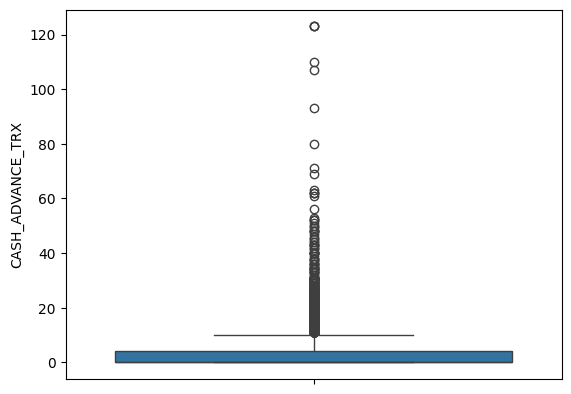

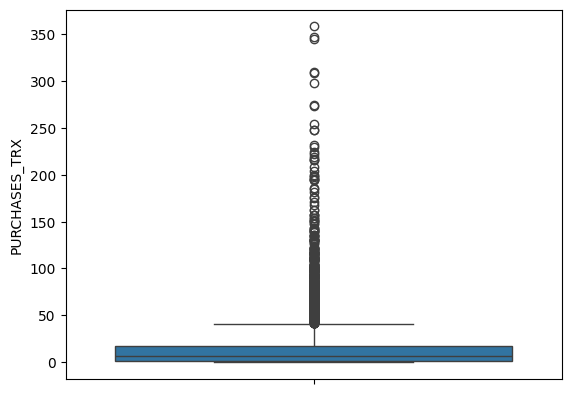

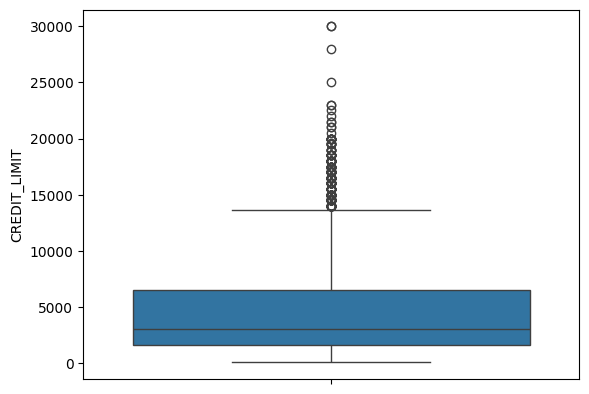

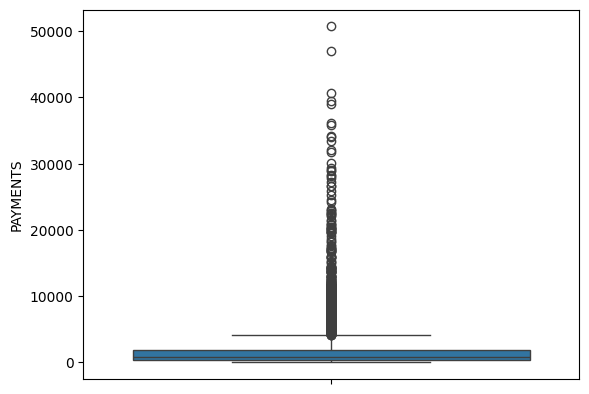

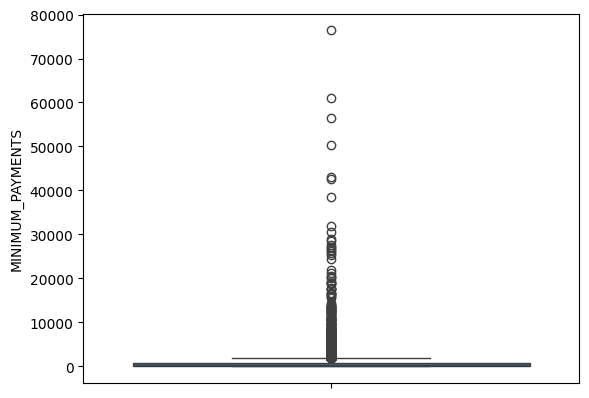

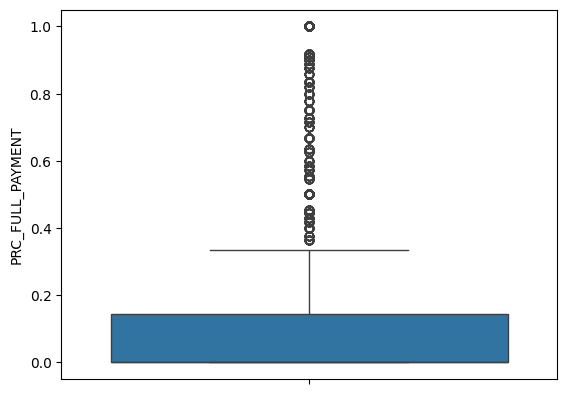

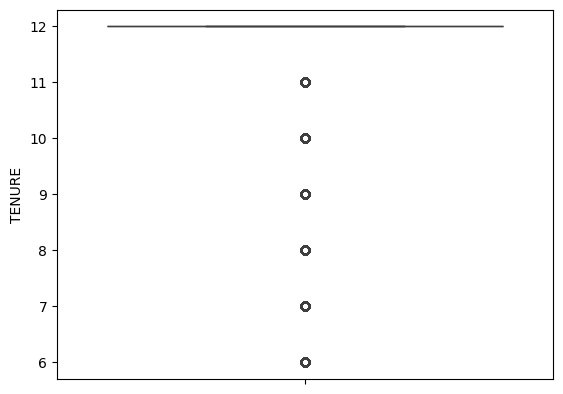

In [21]:
# outliers

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [19]:
df.isnull().sum()

BALANCE                     0
PURCHASES                   0
ONEOFF_PURCHASES            0
INSTALLMENTS_PURCHASES      0
CASH_ADVANCE                0
CASH_ADVANCE_FREQUENCY      0
CASH_ADVANCE_TRX            0
PURCHASES_TRX               0
CREDIT_LIMIT                1
PAYMENTS                    0
MINIMUM_PAYMENTS          313
PRC_FULL_PAYMENT            0
TENURE                      0
dtype: int64

In [22]:
# imputing null values

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [23]:
df.isnull().sum()

BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

<Axes: >

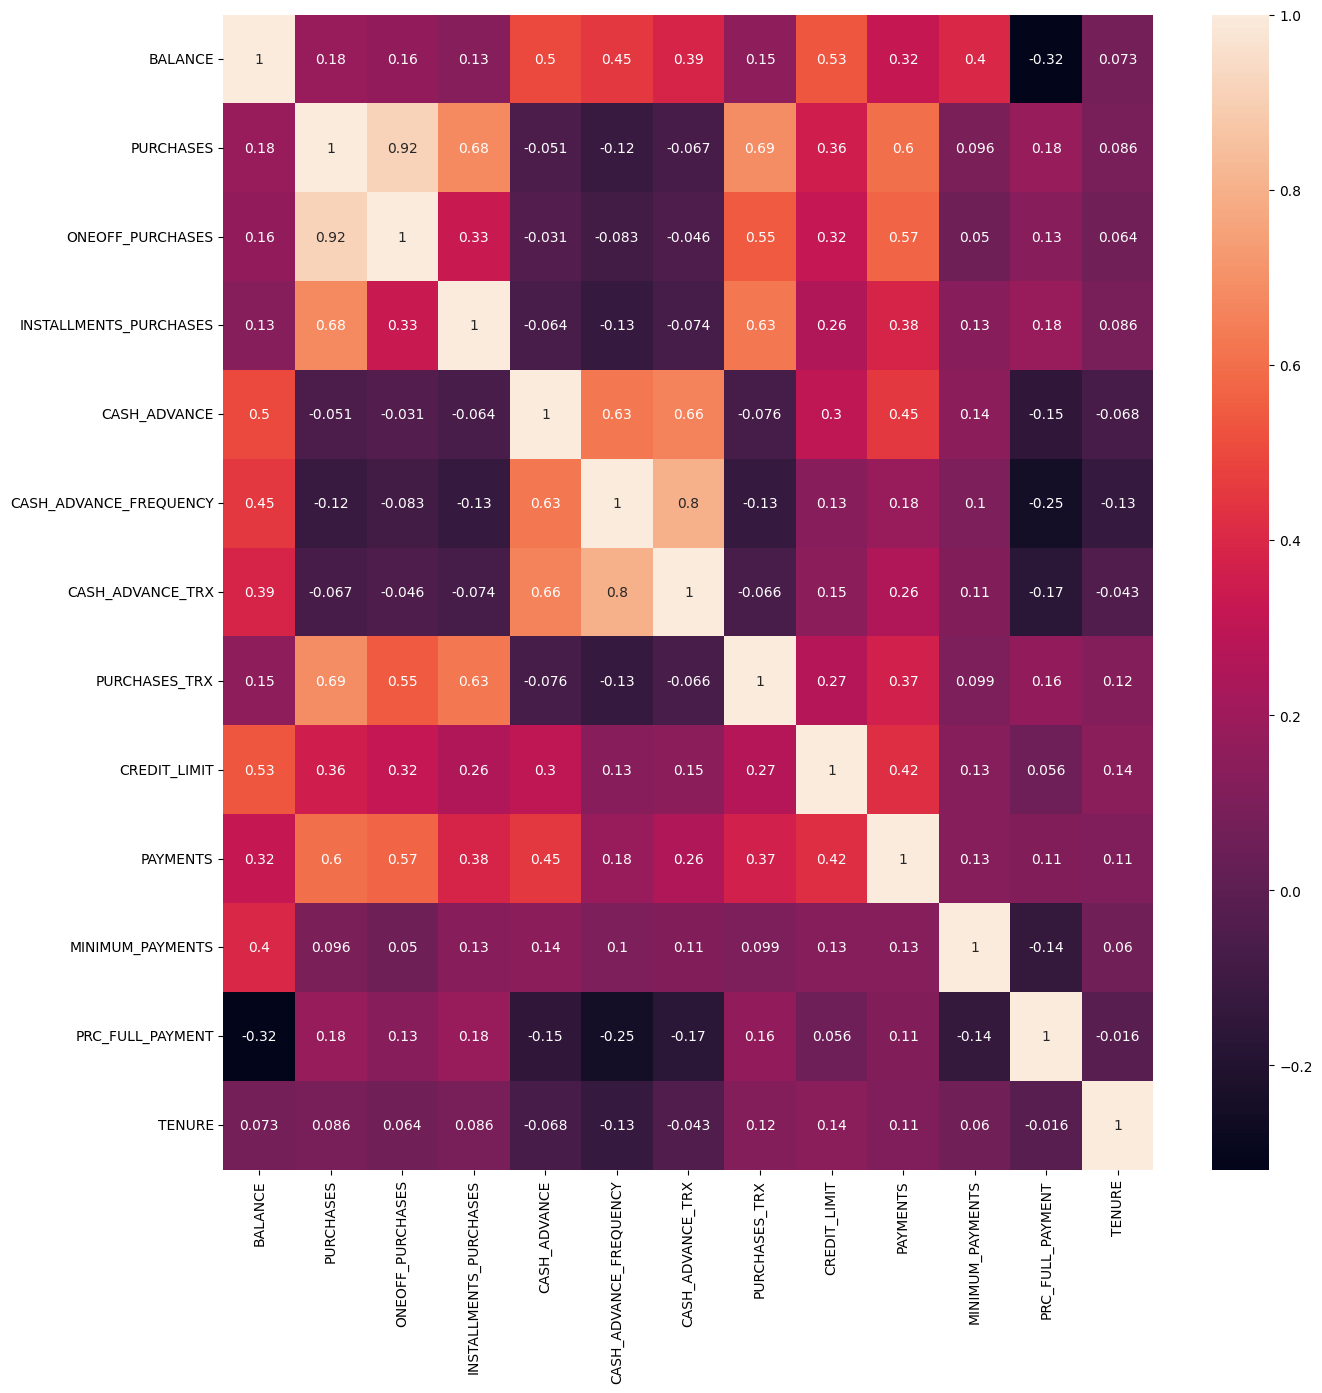

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# threre is an multicolinearity prsent between independent variables so we apply PCA here

In [26]:
# outlier treatment

q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr

ul = q3 + 1.5*iqr

df = df[((df<ll) | (df>ul)).any(axis=1)]

In [27]:
df

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.00,0.00,0.00,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
3,1666.670542,1499.00,1499.00,0.00,205.788017,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
5,1809.828751,1333.28,0.00,1333.28,0.000000,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,7091.01,6402.63,688.38,0.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
10,1293.124939,920.12,0.00,920.12,0.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,300.00,0.00,300.00,0.000000,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,144.40,0.00,144.40,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.00,0.00,0.00,36.558778,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [29]:
df[df.duplicated()]  # no duplicate rows here

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [30]:
df1 = df.copy()

In [31]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [33]:
# scaling

for i in df.columns:
    df[i] = std.fit_transform(df[[i]])

C:\Users\hp\AppData\Local\Temp\ipykernel_16448\1345485267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = std.fit_transform(df[[i]])
C:\Users\hp\AppData\Local\Temp\ipykernel_16448\1345485267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = std.fit_transform(df[[i]])
C:\Users\hp\AppData\Local\Temp\ipykernel_16448\1345485267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [34]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,0.477436,-0.545087,-0.412557,-0.521794,1.901601,0.327337,-0.064419,-0.650959,0.387847,0.458381,-0.034125,-0.062175,0.503022
3,-0.131057,0.008196,0.290063,-0.521794,-0.467641,-0.376222,-0.413818,-0.618654,0.510315,-0.674200,-0.284621,-0.686750,0.503022
5,-0.074337,-0.052972,-0.412557,0.643774,-0.545812,-0.727999,-0.530284,-0.392518,-0.885822,-0.287735,0.405863,-0.686750,0.503022
6,-0.542878,2.072213,2.588521,0.079996,-0.545812,-0.727999,-0.530284,1.416568,1.979934,1.079813,-0.322287,2.123841,0.503022
10,-0.279058,-0.205469,-0.412557,0.282585,-0.545812,-0.727999,-0.530284,-0.263297,-1.032784,-0.375171,0.328555,-0.686750,0.503022


# PCA

In [42]:
# WE CREATE A PCA MODEL FOR 95% VARIANCE

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_model = pca.fit_transform(df)

pca_model.shape

(5102, 10)

In [43]:
pca_model

array([[-3.35586918e-01,  1.58930061e+00, -1.65029044e-01, ...,
         8.21671353e-01, -4.72898020e-01, -3.45509200e-01],
       [-3.69707947e-01, -3.33838939e-01,  5.33805765e-01, ...,
         4.17080314e-02,  4.74370507e-01,  2.85787237e-01],
       [-3.68993947e-01, -7.75502040e-01,  1.07062730e+00, ...,
         9.33567095e-01,  5.11090418e-01, -3.01078382e-01],
       ...,
       [-2.06655513e+00, -1.31290816e+00, -6.54096679e-01, ...,
        -1.27041766e-01, -2.25951940e-01,  4.71634949e-02],
       [-2.27530622e+00, -8.56516954e-01, -9.04216679e-01, ...,
        -3.56231543e-01, -3.63946812e-02, -1.30545086e-03],
       [-1.54428178e+00, -3.95998198e-01, -8.98761451e-01, ...,
        -5.41776271e-01, -2.99432796e-01,  1.95384398e-01]])

In [44]:
pca_data = pd.DataFrame(pca_model,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])

In [46]:
pca_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.335587,1.589301,-0.165029,-1.034577,-0.428120,0.388441,0.396293,0.821671,-0.472898,-0.345509
1,-0.369708,-0.333839,0.533806,-0.249141,-0.993398,-0.321383,-0.808208,0.041708,0.474371,0.285787
2,-0.368994,-0.775502,1.070627,0.277628,0.517866,-0.086195,-0.318947,0.933567,0.511090,-0.301078
3,3.666832,-1.863966,-1.274606,-1.052046,-1.136525,0.814743,-0.064965,-1.512053,-0.233598,0.583975
4,-0.643955,-0.857796,0.951358,0.273008,0.497279,-0.028186,-0.541337,0.891885,0.226121,-0.185084


In [47]:
pca.components_  # eigen values 

array([[ 1.94711712e-01,  4.79335220e-01,  4.18002875e-01,
         3.55766429e-01,  4.11504501e-02, -4.76621801e-02,
        -7.36434213e-03,  3.88386274e-01,  2.96499894e-01,
         3.76612817e-01,  9.29618229e-02,  1.95074611e-02,
         1.93375086e-01],
       [ 3.83621793e-01, -1.20479816e-01, -8.51404044e-02,
        -1.26656709e-01,  4.57187169e-01,  4.68012431e-01,
         4.46211632e-01, -1.29559257e-01,  1.84220845e-01,
         1.49740900e-01,  1.41905235e-01, -3.07255738e-01,
         1.33835039e-02],
       [ 3.51725608e-01, -1.24864953e-01, -1.98061661e-01,
         7.36545984e-02, -2.13631520e-01, -2.19324365e-01,
        -2.76438545e-01,  3.22581740e-02,  1.29267914e-01,
        -2.76808782e-01,  6.34818354e-01, -3.08535431e-01,
         2.30916015e-01],
       [ 4.36130804e-03,  2.05187113e-01,  2.01272440e-01,
         1.10605998e-01, -1.19445519e-01,  1.08129842e-01,
        -4.11670149e-03,  1.42644841e-01, -3.51463627e-01,
        -8.58656612e-02,  1.30384442e

In [49]:
pca.explained_variance_  # eigen_vectors

array([3.64948727, 3.24479788, 1.24184532, 1.06995492, 0.83305141,
       0.74387561, 0.66925937, 0.50850204, 0.37408671, 0.27622705])

In [52]:
pca.explained_variance_ratio_.sum()  # 96% variance is explained by PCA model...

0.969893522888222

# K-MEANS

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(pca_data)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [57]:
import warnings

warnings.filterwarnings('ignore')

## WCSS

In [59]:
# to find optimal value of k

wcss = []

for i in range(1,15):
    km = KMeans(i)
    km_model = km.fit(pca_data)
    wcss.append(km_model.inertia_)
    
wcss

[64329.157799084154,
 53117.814298133875,
 44288.921298044515,
 39705.48444943167,
 35777.43193028506,
 32554.40956701976,
 29851.784100413875,
 27608.77855671085,
 25891.8195425928,
 24475.345327219817,
 23545.585731908388,
 22663.226635947154,
 21720.93255263089,
 20970.54925812414]

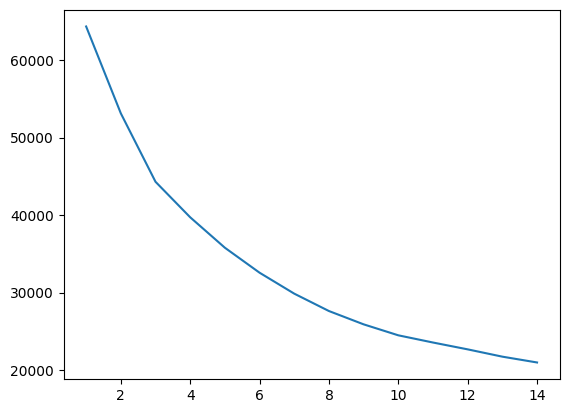

In [60]:
plt.plot(range(1,15),wcss)

# sil_score

In [65]:
from sklearn.metrics import silhouette_score

In [66]:


sil_score = []

for i in range(2,15):
    km = KMeans(i)
    km_model = km.fit(pca_data)
    sil_score.append(silhouette_score(pca_data,km.labels_))
    
    
sil_score

[0.24727374859176082,
 0.2694409953618001,
 0.21642948898915487,
 0.19671452879896417,
 0.2188182902791382,
 0.2235165995628999,
 0.22875063129162287,
 0.2324484343404048,
 0.23103494210374367,
 0.22766229227657803,
 0.21773801426351558,
 0.22450122498150352,
 0.23099363903606893]

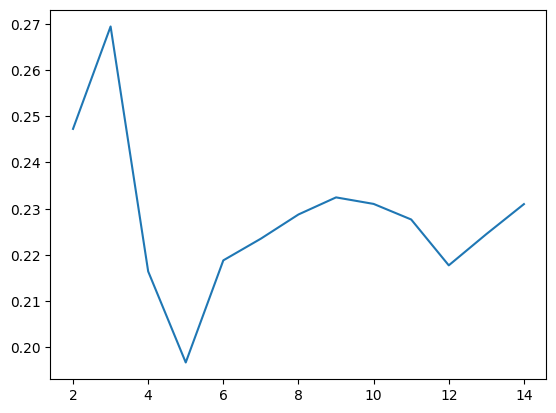

In [67]:
plt.plot(range(2,15),sil_score)

In [ ]:
# k = 3 because sil_core value is good for k = 3

In [68]:
km = KMeans(n_clusters=3)
km_model = km.fit(pca_data)

In [70]:
df1['K_LABELS'] = km.labels_

In [71]:
df1.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_LABELS
1,3202.467416,0.00,0.00,0.00,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,1666.670542,1499.00,1499.00,0.00,205.788017,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
5,1809.828751,1333.28,0.00,1333.28,0.000000,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,7091.01,6402.63,688.38,0.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
10,1293.124939,920.12,0.00,920.12,0.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,2


In [75]:
df1.shape

(5102, 14)

# visualization

<Axes: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

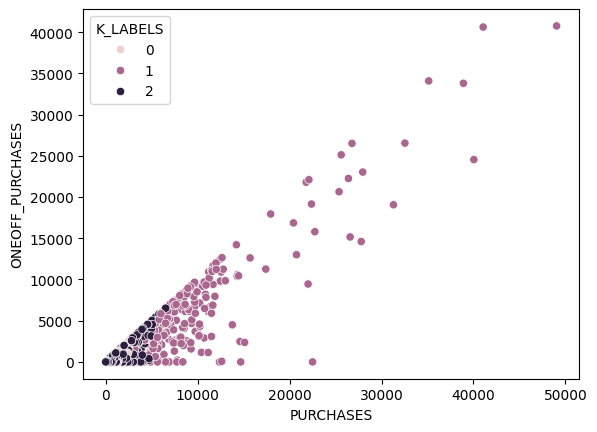

In [79]:
sns.scatterplot(data=df1,x='PURCHASES',y='ONEOFF_PURCHASES',hue='K_LABELS')

<Axes: xlabel='CASH_ADVANCE_TRX', ylabel='CASH_ADVANCE_FREQUENCY'>

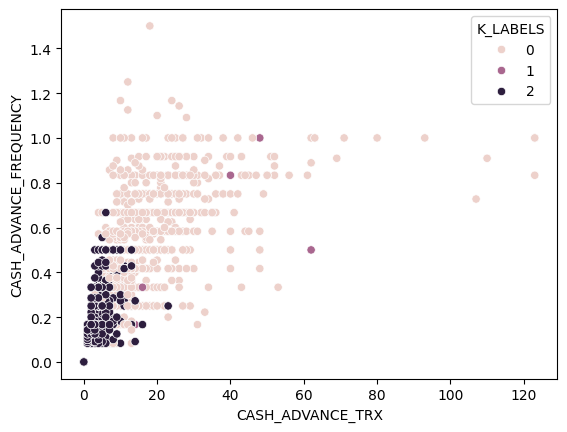

In [81]:
sns.scatterplot(data=df1,x='CASH_ADVANCE_TRX',y='CASH_ADVANCE_FREQUENCY',hue='K_LABELS')

In [ ]:
# LABLES ARE PROPERLY DISTRIBUTED

In [87]:
# K_LABEL = 0

df1[df1['K_LABELS']==0].describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_LABELS
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.0
mean,4147.965933,550.143384,335.997678,214.213172,4047.985824,0.452383,12.905773,8.646317,6979.598239,3244.330198,1921.832122,0.037083,11.353683,0.0
std,2760.865053,939.769325,700.941446,468.977294,3434.619216,0.228412,11.517485,15.506767,3831.892707,3991.903303,3899.502433,0.104455,1.504417,0.0
min,36.979201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,0.0
25%,1892.000231,0.000000,0.000000,0.000000,1967.515954,0.250000,6.000000,0.000000,4000.000000,1031.827597,586.492839,0.000000,12.000000,0.0
50%,3688.371995,79.800000,0.000000,0.000000,3317.250842,0.416667,11.000000,1.000000,6500.000000,1846.287674,1182.650916,0.000000,12.000000,0.0
75%,5833.516562,716.970000,333.075000,196.475000,5063.133456,0.583333,16.000000,11.000000,9000.000000,3830.928229,1974.315199,0.000000,12.000000,0.0
max,16304.889250,7194.530000,6678.260000,4059.930000,47137.211760,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,0.0


In [88]:
# K_LABEL = 1


df1[df1['K_LABELS']==1].describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_LABELS
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0
mean,3816.800585,8348.385572,5474.269238,2875.875865,660.704822,0.067422,2.032258,94.478006,10046.627566,7944.197538,2205.389693,0.277626,11.958944,1.0
std,3460.330174,6330.078331,5794.860479,2885.454845,1963.379988,0.150504,6.237139,59.973746,4890.990704,7405.251527,5502.419825,0.383869,0.373478,0.0
min,34.207779,900.870000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,108.937025,0.000000,6.000000,1.0
25%,984.724235,5105.170000,2252.370000,1019.810000,0.000000,0.000000,0.000000,55.000000,6500.000000,3670.569073,280.509038,0.000000,12.000000,1.0
50%,2813.134224,6477.600000,3854.620000,2166.870000,0.000000,0.000000,0.000000,84.000000,9500.000000,5773.661106,811.061687,0.000000,12.000000,1.0
75%,5643.992345,9228.970000,6812.040000,3799.920000,237.066662,0.083333,1.000000,116.000000,12500.000000,8880.955481,2129.183138,0.583333,12.000000,1.0
max,19043.138560,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.0


In [89]:
# K_LABEL = 2


df1[df1['K_LABELS']==2].describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_LABELS
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.0
mean,810.840617,1185.846140,650.749745,535.266721,308.955708,0.053824,0.948986,17.688998,4207.446422,1494.520277,722.515359,0.336843,10.976030,2.0
std,1145.784025,1217.875607,999.585697,681.253253,714.886434,0.099792,2.041495,19.211695,3464.558310,1762.167790,1912.657387,0.386676,1.806513,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.261984,0.000000,6.000000,2.0
25%,58.374723,213.140000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1500.000000,364.220167,143.752043,0.000000,11.000000,2.0
50%,269.116256,750.485000,103.840000,280.000000,0.000000,0.000000,0.000000,12.000000,3000.000000,946.377430,186.246009,0.100000,12.000000,2.0
75%,1168.032198,1889.787500,1001.665000,817.915000,169.275829,0.083333,1.000000,25.000000,6000.000000,2009.805674,462.335863,0.666667,12.000000,2.0
max,6976.346140,6520.000000,6520.000000,4538.840000,5452.074197,0.666667,23.000000,186.000000,25000.000000,28988.973880,28483.254830,1.000000,12.000000,2.0


In [ ]:
# INFERENCE:-

# BALANCE AMOUNT IS VERY LOW (810.84) FOR CLUSTER 2 OTHER THAN CLUSTER 0 AND 1
# AMOUNT OF PURCHASE MADE FROM ACCOUNT FOR CLUSTER 0 IS VERY LOW (550.14) OTHER THAN CLUSTER 1 AND 2
# MAXIMUM AMOUNT OF PURCHASE DONE IN ONE-GO IS HIGHER FOR CLUSTER 1 (5474.26)
# AMOUNT OF PURCHASE DONE IN INSTALLEMNTS IS HIGHER FOR CLUSTER 1 (2875.87)
# CASH IN ADVANCE GIVEN BY THE USER IS HIGHER FOR CLUSTER 0 IS (4047.98)
# NUMER OF TRANSACTIONS MADE WITH "Cash in Advanced" IS HIGHER FOR CLUSTER 0 (123 TRANSACTIONS)
# NUMBER OF PURCHASE TRANSACTIONS MADE BY CLUSTER 1 IS MAXIMUM (94 TRANSACTIONS)
# LIMIT OF CREDIT CARD FOR A USER IS HIGHER FOR CLUSTER 1 (10000.25)
# AMOUNT OF PAYMENTS DONE BY USER IS MAXIMUM FOR CLUSTER 1 (7944)
# PERCENT OF FULL PAYMENT PAID BY USER FOR CLUSTER 0 IS VERY LOW (0.037)
# TENURE OF CREDIT CARD SERVICE FOR USER IS SAME FOR CLUSTER 0,1,AND 2

## MODEL BUILDING

In [93]:
from sklearn.model_selection import train_test_split

x = df1.drop('K_LABELS',axis=1)
y = df1['K_LABELS']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=10)

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT_MODEL = DT.fit(xtrain,ytrain)
train_pred = DT_MODEL.predict(xtrain)
test_pred = DT_MODEL.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       245
           2       1.00      1.00      1.00      2286

    accuracy                           1.00      3571
   macro avg       1.00      1.00      1.00      3571
weighted avg       1.00      1.00      1.00      3571

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       467
           1       0.85      0.85      0.85        96
           2       0.96      0.95      0.96       968

    accuracy                           0.94      1531
   macro avg       0.91      0.91      0.91      1531
weighted avg       0.94      0.94      0.94      1531



In [ ]:
# MODEL PERFORMING GOOD .....